# mmdflow
Detect water in a static image of an oil-water flow experiment.

## Description
A gray-scale image of an oil-water flow experiment is processed. This image is composed of a top-lateral view of a transparent pipe containing water, in the center, and oil, around the water. This procedure detects the region where the water is by using connected filtering, thresholding and shape smoothing. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading
 The gray-scale image of the water-oil flow experiment is read.

(-0.5, 226.5, 192.5, -0.5)

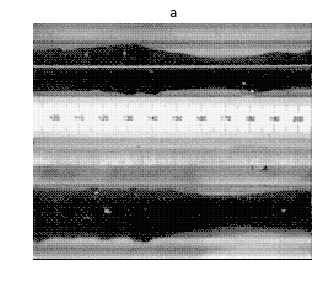

In [2]:
a_pil = Image.open('data/flow.tif').convert('L')
a = np.array (a_pil)
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# Dark region enhancement
The dark region of the image is enhanced by the close top-hat operator. 

(-0.5, 226.5, 192.5, -0.5)

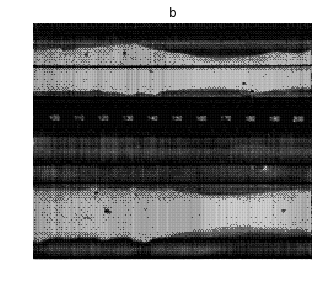

In [3]:
b=ia.iacloseth(a,ia.iaseline(50,90));
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('b')
axes.imshow(b, cmap='gray')
axes.axis('off')

## Filtering

A connected filtering is applied to remove small artifacts present in the image. 

(-0.5, 226.5, 192.5, -0.5)

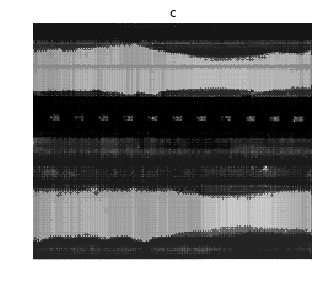

In [4]:
c=ia.iacloserec(b,ia.iasebox(5));
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('c')
axes.imshow(c, cmap='gray')
axes.axis('off')

## Shape filtering

An alternated sequential filtering is used for shape smoothing. 

(-0.5, 226.5, 192.5, -0.5)

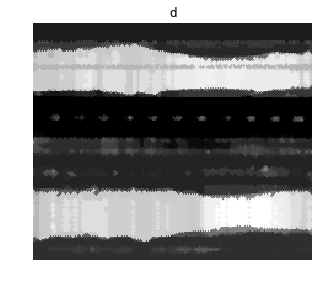

In [5]:
d=ia.iaasf(c,'co',ia.iasecross());
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('d')
axes.imshow(d, cmap='gray')
axes.axis('off')

# Thresholding

The original and thresholded image overlayed on the original are presented successively. 

(-0.5, 226.5, 192.5, -0.5)

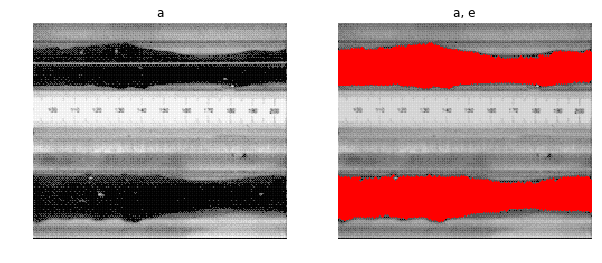

In [6]:
e=ia.iathreshad(d,100);

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 7))
axes[0].set_title('a')
axes[0].imshow(a, cmap='gray')
axes[0].axis('off')
axes[1].set_title('a, e')
axes[1].imshow(ia.iagshow(a, e).transpose(1, 2, 0), cmap='gray')
axes[1].axis('off')